# DATA ANALYTICS LOGISTICS

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importando a base

In [4]:
df = pd.read_csv("Base/bd.csv")

### Composição de coluna e head

In [23]:
df.head()

,ID_transporte,data,tempo_viagem,velocidade_media,consumo_combustivel,carga_transportada,ID_motorista,feedback_cliente
0,1,2022-01-01 08:15:00,30,60,10,100,101,4.5
1,2,2022-01-02 14:30:00,45,55,15,200,102,4.2
2,3,2022-01-02 10:45:00,20,40,8,50,103,4.8
3,4,2022-01-03 09:20:00,35,50,12,150,101,3.9
4,5,2022-01-04 12:10:00,50,45,18,250,104,4.6


### Tipos de dados

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_transporte        100 non-null    int64  
 1   data                 100 non-null    object 
 2   tempo_viagem         100 non-null    int64  
 3   velocidade_media     100 non-null    int64  
 4   consumo_combustivel  100 non-null    int64  
 5   carga_transportada   100 non-null    int64  
 6   ID_motorista         100 non-null    int64  
 7   feedback_cliente     100 non-null    float64
dtypes: float64(1), int64(6), object(1)
memory usage: 6.4+ KB


### Principais informações sobre a base

In [25]:
df.describe()

,ID_transporte,tempo_viagem,velocidade_media,consumo_combustivel,carga_transportada,ID_motorista,feedback_cliente
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,39.750000,46.85000,13.490000,165.800000,104.250000,4.458000
std,29.011492,9.544553,7.83849,3.355969,64.810212,2.266912,0.280036
min,1.000000,20.000000,35.00000,8.000000,50.000000,101.000000,3.700000
25%,25.750000,30.000000,40.00000,10.000000,100.000000,102.000000,4.200000
50%,50.500000,40.000000,45.00000,13.000000,150.000000,104.000000,4.500000
75%,75.250000,46.250000,51.25000,15.500000,205.000000,106.000000,4.700000
max,100.000000,55.000000,60.00000,20.000000,300.000000,108.000000,4.900000


### Verificando a presenção de dados faltantes

In [26]:
df.isna().sum()

ID_transporte          0
data                   0
tempo_viagem           0
velocidade_media       0
consumo_combustivel    0
carga_transportada     0
ID_motorista           0
feedback_cliente       0
dtype: int64

### Observar alguns comportamentos iniciais dos dados

#### Existem 11 tipos de cargas a serem transportadas

##### Podemos observar algumas tendências para cada tipo de carga

In [27]:
df['carga_transportada'].unique()

array([100, 200,  50, 150, 250,  80, 180, 300, 120, 220, 280], dtype=int64)

In [59]:
def grafico_hist(x):
  fig=px.histogram(df, x=x)
  fig.show()

x='carga_transportada'
grafico_hist(x)

### Apresentar os detalhes principais e iremos depois correlacionar com o tipo de carga, entender se muda algo ou não

In [54]:
def DescricaoBasica(Column):
    media = df[Column].mean()  
    mediana = df[Column].median()  
    desvio_padrao = df[Column].std() 
    min = df[Column].min() 
    max = df[Column].max() 

    return {
        'Média': media,
        'Mediana': mediana,
        'Desvio Padrão': desvio_padrao,
        'Mínimo': min,
        'Máximo': max
    }

In [55]:
DescricaoBasica('consumo_combustivel')

{'Média': 13.49,
 'Mediana': 13.0,
 'Desvio Padrão': 3.355968601242457,
 'Mínimo': 8,
 'Máximo': 20}

In [56]:
DescricaoBasica('feedback_cliente')

{'Média': 4.458,
 'Mediana': 4.5,
 'Desvio Padrão': 0.28003607271243114,
 'Mínimo': 3.7,
 'Máximo': 4.9}

In [57]:
DescricaoBasica('tempo_viagem')

{'Média': 39.75,
 'Mediana': 40.0,
 'Desvio Padrão': 9.544552626943016,
 'Mínimo': 20,
 'Máximo': 55}

In [58]:
DescricaoBasica('velocidade_media')

{'Média': 46.85,
 'Mediana': 45.0,
 'Desvio Padrão': 7.838489598890795,
 'Mínimo': 35,
 'Máximo': 60}

In [61]:
resultados = df.groupby('carga_transportada').agg(
    media_velocidade=('velocidade_media', 'mean'),
    media_consumo=('consumo_combustivel', 'mean'),
    media_tempo_viagem=('tempo_viagem', 'mean'),
    feedback_medio=('feedback_cliente', 'mean'),
    count=('ID_transporte', 'count')  
).reset_index()

resultados

,carga_transportada,media_velocidade,media_consumo,media_tempo_viagem,feedback_medio,count
0,50,40.000000,8.000000,20.000000,4.800000,1
1,80,59.583333,8.916667,25.000000,4.516667,12
2,100,54.615385,10.000000,30.000000,4.507692,13
3,120,50.416667,11.166667,35.000000,4.466667,12
4,150,45.384615,12.923077,39.615385,4.400000,13
5,180,40.000000,14.000000,40.000000,4.400000,12
6,200,50.000000,15.000000,45.000000,4.425000,12
7,220,40.000000,17.090909,50.000000,4.490909,11
8,250,42.500000,18.000000,50.000000,4.250000,2
9,280,35.000000,19.000000,55.000000,4.460000,10


## **Carga 50**:
#### **Observação**: A velocidade média de 40 km/h é baixa, o tempo de viagem de 20 minutos é o menor, sugerindo que a entrega pode ser de carga complexa ou de trecho de difícil locomoção e acesso.
#### **Feedback Alto**: O feedback médio de 4.8 sugere que a entrega foi considerada eficiente ou satisfatória, possivelmente devido à sua previsibilidade ou condições favoráveis. Sugerindo, inclusive, que viagens de entregas mais rápidas podem trazer melhor satisfação do cliente.
#### **Conclusão**: A alta avaliação dos clientes pode indicar que prazos curtos, mesmo com velocidade baixa, são bem recebidos.

## **Carga Pesada (250 e 300)**:
#### **Velocidade e Tempo de Viagem**: Para cargas pesadas, a velocidade média cai para 35 km/h, e o tempo de viagem aumenta para 55 minutos.
#### **Feedback**: O feedback médio para essas cargas é mais baixo, entre 4.25 e 4.5.
#### **Análise**: O aumento no tempo de entrega com carga mais pesada parece estar relacionado a uma leve queda na satisfação, o que pode indicar que o impacto do tempo de espera é significativo.


## **Tendência Geral e Relações Entre Variáveis**:

#### **Velocidade e Consumo**: A velocidade média diminui à medida que a carga e o tempo de viagem aumentam. Isso pode estar associado a mais paradas e, consequentemente, um aumento no consumo médio. O consumo de combustível aumenta proporcionalmente à carga, com um aumento significativo no consumo para cargas acima de 150 unidades.
#### **Feedback e Tempo**: Um feedback médio decrescente com o aumento do tempo de viagem sugere que entregas mais longas impactam negativamente a percepção do cliente, possivelmente pela espera e pelo custo.
#### **Carga e Consumo**: Quanto maior a carga maior o consumo.

## Para confirmar se o tempo está correlacionado com o feedback

In [84]:
correlacao_tempo_feedback = df[['tempo_viagem', 'feedback_cliente']].corr()
correlacao_tempo_feedback

,tempo_viagem,feedback_cliente
tempo_viagem,1.00000,-0.08522
feedback_cliente,-0.08522,1.00000


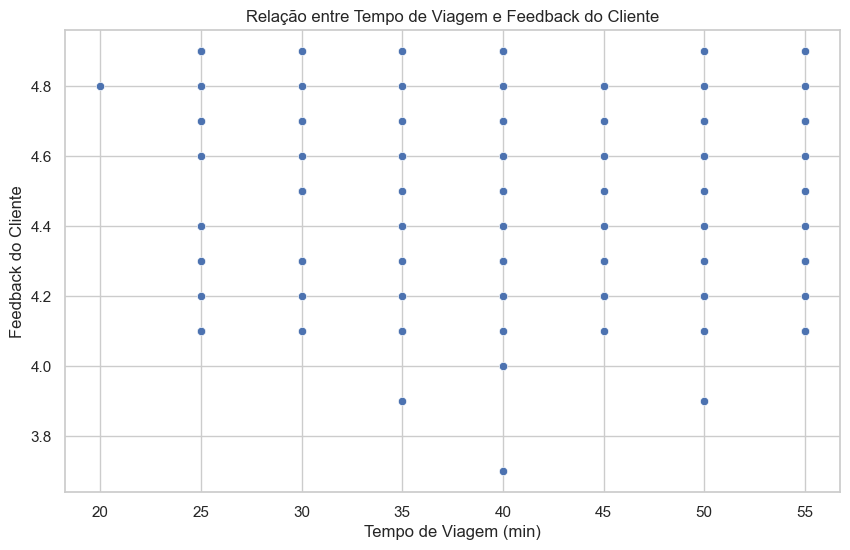

In [85]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_viagem', y='feedback_cliente', data=df)

plt.title("Relação entre Tempo de Viagem e Feedback do Cliente")
plt.xlabel("Tempo de Viagem (min)")
plt.ylabel("Feedback do Cliente")

plt.show()

    Note que não tem relação significativa com tempo e feedback, demonstrando que algumas cargas tem seu tempo determinado e esperado, outros fatores irão influenciar um pouco mais.

### A fim de verificar outras correlações

#### Criar coluna horario de pico para verificar se teriamos correlação

In [90]:
df_operacao = df.copy()
df_operacao['data'] = pd.to_datetime(df_operacao['data'])
df_operacao['hora'] = df_operacao['data'].dt.hour

horario_pico = ((df_operacao['hora'] >= 7) & (df_operacao['hora'] < 10)) | ((df_operacao['hora'] >= 17) & (df_operacao['hora'] < 20))

df_operacao['horario_pico'] = horario_pico.astype(int)

df_operacao.drop(columns='hora', inplace=True)

df_operacao[['data', 'horario_pico']].head()


,data,horario_pico
0,2022-01-01 08:15:00,1
1,2022-01-02 14:30:00,0
2,2022-01-02 10:45:00,0
3,2022-01-03 09:20:00,1
4,2022-01-04 12:10:00,0


In [105]:
df_operacao.head()

,data,tempo_viagem,velocidade_media,consumo_combustivel,carga_transportada,feedback_cliente,horario_pico
0,2022-01-01 08:15:00,30,60,10,100,4.5,1
1,2022-01-02 14:30:00,45,55,15,200,4.2,0
2,2022-01-02 10:45:00,20,40,8,50,4.8,0
3,2022-01-03 09:20:00,35,50,12,150,3.9,1
4,2022-01-04 12:10:00,50,45,18,250,4.6,0


In [100]:
def CorrelacaoComFeedback(df, feedback_col='feedback_cliente'):
    correlacoes = {}
  
    for column in df.columns:
        if column != feedback_col:
            # correlação de Pearson
            correlacao_pearson = df[column].corr(df[feedback_col])
            # correlação de Spearman
            correlacao_spearman = df[column].corr(df[feedback_col], method='spearman')
            # correlação de Kendall
            correlacao_kendall = df[column].corr(df[feedback_col], method='kendall')
            
            correlacoes[column] = {
                'Pearson': correlacao_pearson,
                'Spearman': correlacao_spearman,
                'Kendall': correlacao_kendall
            }
            
    return correlacoes

resultado_correlacoes = CorrelacaoComFeedback(df_operacao, feedback_col='feedback_cliente')
resultado_correlacoes



{'data': {'Pearson': 0.20225645546993212,
  'Spearman': 0.17851947464326012,
  'Kendall': 0.13111713514080459},
 'tempo_viagem': {'Pearson': -0.08522005228468052,
  'Spearman': -0.08223625768576687,
  'Kendall': -0.06210942872273812},
 'velocidade_media': {'Pearson': 0.07256883213515698,
  'Spearman': 0.0553780103738051,
  'Kendall': 0.042100657260164986},
 'consumo_combustivel': {'Pearson': -0.08213721466209592,
  'Spearman': -0.0882715373091981,
  'Kendall': -0.0658188898556469},
 'carga_transportada': {'Pearson': -0.08940484971154808,
  'Spearman': -0.09193940908553186,
  'Kendall': -0.06886652122292534},
 'horario_pico': {'Pearson': -0.07429365744219206,
  'Spearman': -0.08258828586659846,
  'Kendall': -0.07078388200384621}}

    Nota-se que sendo correção linear ou não linear não existe nada influênciando diretamente os resultados dos feedbacks.

    A maior presença é a data, porém pode ser algo que não seja possível explicar assim sem informação na base, uma vez que verificando por dia da semana não existe correlação, avaliando por horário de pico igualmente não tem correlação. Pode ser ruído ou eventos que não saberemos pela base.

## Visualização destes resultados prévios

In [7]:
x = 'carga_transportada'
y = 'velocidade_media'

fig = px.bar(df, x=x, y=y)

fig.update_traces(marker_color='#1db954')
fig.update_layout(
    title_text='Velocidade Média por Carga Transportada',
    title_font_family='Courier New',
    title_font_color='#1db954',
    plot_bgcolor='#191414',
    height=600,
    width=1000
)
fig.update_xaxes(showgrid=False, zeroline=False, visible=True)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False, hoverformat=False)

fig.show()

In [62]:
def grafico_bar(eixoX, eixoY): 
    fig = px.bar(df, x=eixoX, y=eixoY)
    fig.update_traces(marker_color='#1db954')
    fig.update_layout(
        title_text='Velocidade Média por Carga Transportada',
        title_font_family='Courier New',
        title_font_color='#1db954',
        plot_bgcolor='#191414',
        height=600,
        width=1000
    )
    fig.update_xaxes(showgrid=False, zeroline=False, visible=True)
    fig.update_yaxes(showgrid=False, zeroline=False, visible=False, hoverformat=False)
    fig.show()

x = 'carga_transportada'
y = 'velocidade_media'

grafico_bar(x, y)

In [6]:
x = 'tempo_viagem'
y = 'consumo_combustivel'
z = 'carga_transportada'

fig = px.scatter(df, x=x, y=y, size=z, 
                 title='Relação entre Tempo de Viagem, Consumo de Combustível e Carga Transportada',
                 labels={x: 'Tempo de Viagem (dias)', y: 'Consumo de Combustível (litros)', z: 'Carga Transportada'},
                 hover_name='ID_transporte')

fig.update_layout(title_font_family='Courier New',
                  title_font_color='#1db954',
                  plot_bgcolor='#191414',
                  height=600,
                  width=1000)
fig.show()

In [63]:
def grafico_dispercao(eixoX, eixoY, eixoZ):
    fig = px.scatter(df, x=eixoX, y=eixoY, size=eixoZ, 
                     title='Relação entre Tempo de Viagem, Consumo de Combustível e Carga Transportada',
                     labels={eixoX: 'Tempo de Viagem (dias)', eixoY: 'Consumo de Combustível (litros)', eixoZ: 'Carga Transportada'},
                     hover_name='ID_transporte')
    fig.update_layout(title_font_family='Courier New',
                      title_font_color='#1db954',
                      plot_bgcolor='#191414',
                      height=600,
                      width=1000)
    fig.show()

x = 'tempo_viagem'
y = 'consumo_combustivel'
z = 'carga_transportada'

grafico_dispercao(x, y, z)

In [64]:
def grafico_pizza(eixoX, eixoY):
    df_emp = (df
              .groupby([eixoX])[eixoY]
              .mean()  # Calcula a média do feedback por carga
              .to_frame()
              .reset_index()
             )

    fig = px.pie(df_emp, values=eixoY, names=eixoX,
                 title='Distribuição do Feedback Médio por Carga Transportada')
    fig.update_traces(marker=dict(line=dict(color='#191414', width=2)))  # Adiciona contorno
    fig.show()

x = 'carga_transportada'
y = 'feedback_cliente'

grafico_pizza(x, y)


In [5]:
df_emp = (df
              .groupby(['carga_transportada'])['feedback_cliente']
              .mean()  # Calcula a média do feedback por carga
              .to_frame()
              .reset_index()
             )

fig = px.pie(df_emp, values='feedback_cliente', names='carga_transportada',
                 title='Distribuição do Feedback Médio por Carga Transportada')
fig.update_traces(marker=dict(line=dict(color='#191414', width=2)))  # Adiciona contorno
fig.show()

## Seguiremos com outras análises

### Fatores que afetam o desempenho da frota

#### Tempo de entrega
    Eficiência de combustível

In [70]:
tempo_consumo_carga_motorista = df.groupby(['ID_motorista', 'carga_transportada']).agg({
    'tempo_viagem': 'mean',
    'consumo_combustivel': 'mean'
}).reset_index()
tempo_consumo_carga_motorista

,ID_motorista,carga_transportada,tempo_viagem,consumo_combustivel
0,101,100,30.0,10.000000
1,101,120,35.0,11.090909
2,101,150,37.5,12.500000
3,102,100,30.0,10.000000
4,102,150,40.0,13.000000
5,102,200,45.0,15.000000
6,103,50,20.0,8.000000
7,103,80,25.0,9.000000
8,103,100,30.0,10.000000
9,103,120,35.0,12.000000


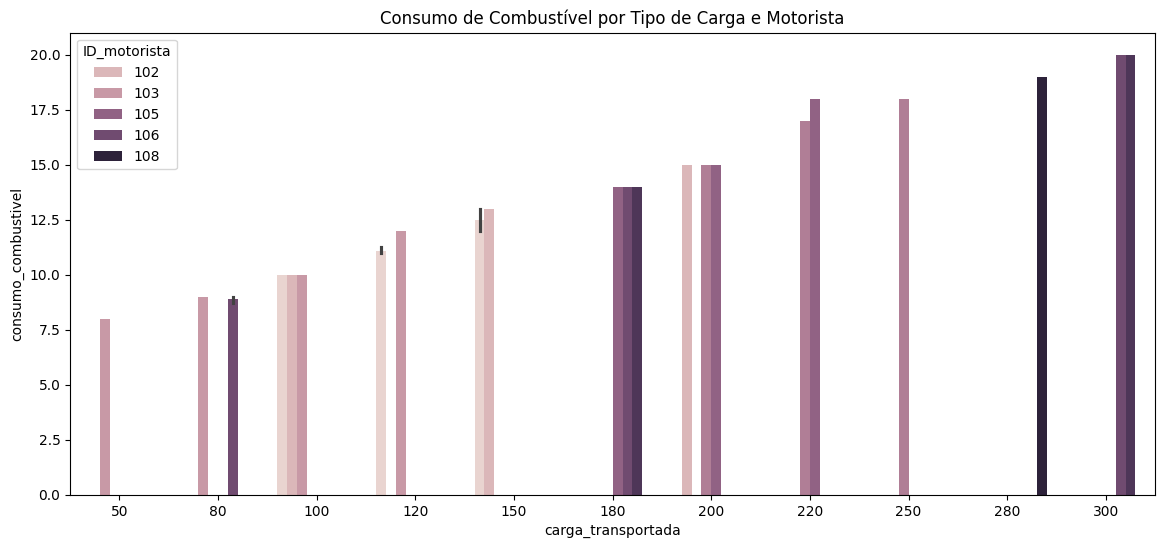

In [72]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='carga_transportada', y='consumo_combustivel', hue='ID_motorista')
plt.title('Consumo de Combustível por Tipo de Carga e Motorista')
plt.show()

    Notamos que tem diferentes consumos para diferentes motoristas em uma mesma carga. Pode significar algo como a condução do motorista ou outros fatores como momento em que estava sendo feito a carga.

In [76]:
diferentes_tempos = df.groupby(['ID_motorista', 'carga_transportada'])['tempo_viagem'].nunique().reset_index()

diferentes_tempos = diferentes_tempos[diferentes_tempos['tempo_viagem'] > 1]

diferentes_tempos


,ID_motorista,carga_transportada,tempo_viagem
2,101,150,2


        Motorista 101 tem carga 150 com dois tempos diferentes.

In [75]:
analise_motorista = df[(df['ID_motorista'] == 101) & (df['carga_transportada'] == 150)]

analise_motorista


,ID_transporte,data,tempo_viagem,velocidade_media,consumo_combustivel,carga_transportada,ID_motorista,feedback_cliente
3,4,2022-01-03 09:20:00,35,50,12,150,101,3.9
9,10,2022-01-07 11:45:00,40,45,13,150,101,4.0


    A ligeira redução na velocidade média do Transporte 9, com um tempo de viagem mais longo, pode indicar condições de tráfego diferentes ou necessidade de paradas adicionais.

    Transporte 3 teve um consumo de 12 litros, enquanto o Transporte 9 consumiu 13 litros.

    O aumento no consumo de combustível no Transporte 9, apesar da carga ser a mesma, pode estar relacionado ao tempo de viagem maior e à redução da velocidade média, possivelmente exigindo mais esforço do motor.

    Apesar de maior consumo, ocorreu uma ligeira melhora no feedback. Isso, conciliado com outros fatores pode indicar que a carga chegou em melhores condições.
    

    **Outro ponto** considerando horário de pico das 7h - 10h e 17h - 20h, o motorista 101 teria feito um tempo menor em horário de pico do que em horário fora de pico.

In [78]:
diferentes_consumos = df.groupby(['ID_motorista', 'carga_transportada'])['consumo_combustivel'].nunique().reset_index()

diferentes_consumos = diferentes_consumos[diferentes_consumos['consumo_combustivel'] > 1]

diferentes_consumos


,ID_motorista,carga_transportada,consumo_combustivel
1,101,120,2
2,101,150,2
16,106,80,2


In [9]:
motorista_106 = df[(df['ID_motorista'] == 106) & (df['carga_transportada'] == 80)]
motorista_101_1 = df[(df['ID_motorista'] == 101) & (df['carga_transportada'] == 150)]
motorista_101_2 = df[(df['ID_motorista'] == 101) & (df['carga_transportada'] == 120)]

motorista_106

,ID_transporte,data,tempo_viagem,velocidade_media,consumo_combustivel,carga_transportada,ID_motorista,feedback_cliente
22,23,2022-01-20 10:15:00,25,60,8,80,106,4.9
30,31,2022-01-28 10:10:00,25,60,9,80,106,4.4
38,39,2022-02-05 16:05:00,25,60,9,80,106,4.9
46,47,2022-02-13 16:30:00,25,60,9,80,106,4.4
54,55,2022-02-21 17:00:00,25,60,9,80,106,4.8
62,63,2022-03-01 17:50:00,25,60,9,80,106,4.3
70,71,2022-03-09 18:40:00,25,60,9,80,106,4.7
78,79,2022-03-17 19:40:00,25,60,9,80,106,4.2
86,87,2022-03-25 20:40:00,25,60,9,80,106,4.6
94,95,2022-04-02 21:40:00,25,60,9,80,106,4.1


## Analise acerca da presença de variação de consumo e feedback do motorista 106

**Observações Gerais**
    O tempo de viagem permanece constante em 25 minutos, com uma velocidade média de 60 km/h em todos os registros, sugerindo consistência no trajeto e condições estáveis de trânsito, o que favorece a pontualidade e previsibilidade.

    A carga transportada é mantida em 80, e o consumo de combustível varia de 8 a 9 litros. Esse consumo, relativamente baixo, sugere que o trajeto é eficiente em relação ao consumo, possivelmente devido à alta velocidade média.
    
**Necessário investigar**
22	23	2022-01-20 10:15:00	25	60	8	80	106	4.9
30	31	2022-01-28 10:10:00	25	60	9	80	106	4.4

    Mesma velocidade, horário muito similar, mesma carga, mas consumo diferente e feedback bem diferente.

**Pontos importantes**
    Entregas em Horários de Pico (entre 7h-10h e 17h-20h): Observa-se que os horários de 17h50, 18h40, 19h40 e 20h40 estão dentro do período de pico. Nessas entregas, o feedback tende a ser mais baixo (4.2, 4.3), sugerindo que o trânsito ou os atrasos podem impactar a experiência do cliente, mesmo com a velocidade média mantida. 

    Entregas Fora dos Horários de Pico: Entregas como às 10h15 e 10h10, feitas fora do horário de pico, receberam feedback mais positivo (4.9 e 4.4), o que pode indicar que os clientes valorizam as entregas feitas em horários de menor congestionamento, possivelmente por serem mais pontuais e tranquilas.

**Conclusões**

    Horário de Entrega e Feedback: Entregas realizadas fora dos horários de pico parecem ter feedback mais positivo, sugerindo que, sempre que possível, programar as entregas para esses horários poderia melhorar a percepção do cliente.

**Caso, não seja somente por percepções e anseios dos clientes**, poderá ser necessário investigar o comportamento do motorista 106 quando o transporte é em horário de pico, pois seu comportamento pode estar interferindo na satisfação do cliente.

    Avaliar alternativas para reduzir o impacto do trânsito nos horários de pico pode ser benéfico para melhorar o feedback geral e a eficiência do serviço.

In [10]:
motorista_101_1

,ID_transporte,data,tempo_viagem,velocidade_media,consumo_combustivel,carga_transportada,ID_motorista,feedback_cliente
3,4,2022-01-03 09:20:00,35,50,12,150,101,3.9
9,10,2022-01-07 11:45:00,40,45,13,150,101,4.0


In [11]:
motorista_101_2

,ID_transporte,data,tempo_viagem,velocidade_media,consumo_combustivel,carga_transportada,ID_motorista,feedback_cliente
17,18,2022-01-15 09:45:00,35,50,11,120,101,4.1
25,26,2022-01-23 09:40:00,35,50,12,120,101,4.6
33,34,2022-01-31 09:35:00,35,50,11,120,101,4.2
41,42,2022-02-08 09:55:00,35,50,11,120,101,4.6
49,50,2022-02-16 10:25:00,35,50,11,120,101,4.1
57,58,2022-02-24 11:15:00,35,50,11,120,101,4.5
65,66,2022-03-04 12:05:00,35,50,11,120,101,4.9
73,74,2022-03-12 13:05:00,35,50,11,120,101,4.4
81,82,2022-03-20 14:05:00,35,50,11,120,101,4.8
89,90,2022-03-28 15:05:00,35,50,11,120,101,4.3


#### Os pontos levantados para o motorista 106 pode ser apllicado ao 101 nos aspectos de observar a rota e se existe razão para o consumo maior no ID 26.
**Porém, igualmente ao 106** nota-se como existe uma inconstância no feedback, apesar de constante outros fatores.

In [79]:
casos_variedade_consumo = df[(df['ID_motorista'].isin([101, 106])) & 
                             (df['carga_transportada'].isin([120, 150, 80]))]

casos_variedade_consumo


,ID_transporte,data,tempo_viagem,velocidade_media,consumo_combustivel,carga_transportada,ID_motorista,feedback_cliente
3,4,2022-01-03 09:20:00,35,50,12,150,101,3.9
9,10,2022-01-07 11:45:00,40,45,13,150,101,4.0
17,18,2022-01-15 09:45:00,35,50,11,120,101,4.1
22,23,2022-01-20 10:15:00,25,60,8,80,106,4.9
25,26,2022-01-23 09:40:00,35,50,12,120,101,4.6
30,31,2022-01-28 10:10:00,25,60,9,80,106,4.4
33,34,2022-01-31 09:35:00,35,50,11,120,101,4.2
38,39,2022-02-05 16:05:00,25,60,9,80,106,4.9
41,42,2022-02-08 09:55:00,35,50,11,120,101,4.6
46,47,2022-02-13 16:30:00,25,60,9,80,106,4.4


In [15]:
df_motoristas = df[df['ID_motorista'].isin([101, 106])]

In [13]:
fig = px.line(df_motoristas, x='carga_transportada', y='velocidade_media', color='ID_motorista', markers=True,
              title='Velocidade Média por Carga e Motorista')
fig.update_layout(xaxis_title='Carga Transportada', yaxis_title='Velocidade Média (km/h)')
fig.show()

c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1983: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [14]:
fig = px.scatter(df_motoristas, x='carga_transportada', y='feedback_cliente', color='ID_motorista',
                 size='consumo_combustivel', hover_data=['velocidade_media'],
                 title='Feedback do Cliente por Carga, Consumo e Motorista')
fig.update_layout(xaxis_title='Carga Transportada', yaxis_title='Feedback do Cliente')
fig.show()

### Aqui podemos confirmar problemas nas inconstâncias dos motoristas 101 e 106

    Ambos motoristas já tiveram variação de consumo.

    O motorista 101 tem variação de velocidade, sendo que foi mais rápido em horário de pico.

**Mas, é preocupante** a variação de feedback para cenários tão similares.

## Vamos investigar se a carga compromete feedback

In [80]:
feedback_por_carga_motorista = df.groupby(['ID_motorista', 'carga_transportada'])['feedback_cliente'].mean().reset_index()
feedback_por_carga_motorista


,ID_motorista,carga_transportada,feedback_cliente
0,101,100,4.500000
1,101,120,4.472727
2,101,150,3.950000
3,102,100,4.500000
4,102,150,4.481818
5,102,200,4.200000
6,103,50,4.800000
7,103,80,4.450000
8,103,100,4.510000
9,103,120,4.400000


### Aqui temos que fazer algumas suposições:

#### Com o motorista 101 o aumento da carga (100 para 150) fez com que seu feedback fosse de 4.5 para 3.9. Isso pode indicar que o aumento da carga afetou a performance ou a satisfação do cliente.

#### O motorista 103 teve feedbacks que variam de 4.45 a 4.8 enquanto transportava cargas entre 50 e 120. Este motorista parece manter um feedback consistentemente alto independentemente da carga, indicando um bom desempenho no atendimento ao cliente.

#### O motorista 105 apresenta um feedback de 3.7 para uma carga de 180, mas alcança 4.7 ao transportar 220. Isso sugere que a carga pode ter impactado a entrega ou a experiência do cliente, podendo haver um ponto de melhoria aqui.

        Esta relação de aumento de carga e redução do feedback não verdade visualizando a correlação e visualizando o resultado da carga 220 com o motorista 105. Demonstrando que alguns motoristas não estão com boa performace em cargas altas.

        Contudo, o motorista 105 apresenta um feedback de 3.7 ao transportar uma carga de 180, o que é significativamente mais baixo do que outros motoristas com cargas semelhantes. Logo, tem uma tendência a se desempenhar com cargas mais altas, podendo ser um ponto de melhoria na logistica ao transferir para ele as cargas mais altas e retirar do motorista 101.

## Melhores desempenhos por feedback

In [114]:
motoristas = df['ID_motorista'].unique()
motoristas

array([101, 102, 103, 104, 105, 106, 107, 108], dtype=int64)

In [117]:
melhores_desempenhos = df[df['feedback_cliente'] >= 4.9].sort_values(by='ID_motorista')
melhores_desempenhos

,ID_transporte,data,tempo_viagem,velocidade_media,consumo_combustivel,carga_transportada,ID_motorista,feedback_cliente
65,66,2022-03-04 12:05:00,35,50,11,120,101,4.9
74,75,2022-03-13 14:40:00,40,45,13,150,102,4.9
92,93,2022-03-31 19:25:00,30,55,10,100,103,4.9
83,84,2022-03-22 19:30:00,50,40,17,220,104,4.9
22,23,2022-01-20 10:15:00,25,60,8,80,106,4.9
38,39,2022-02-05 16:05:00,25,60,9,80,106,4.9
47,48,2022-02-14 14:55:00,40,40,14,180,107,4.9
56,57,2022-02-23 14:40:00,55,35,19,280,108,4.9


In [119]:
df[df['ID_motorista'] == 105]['feedback_cliente'].max()


4.8

### O motorista 105 é o único que não tem um feedback superior a 4.9, que é 4.8

In [125]:
def melhor_desempenho_por_carga(df):
    resultados = {}
    
    # Agrupar pelo valor da carga
    for carga in df['carga_transportada'].unique():
        # Filtrar os dados para a carga específica
        carga_df = df[df['carga_transportada'] == carga]
        
        # Encontrar o menor tempo de viagem e menor consumo para essa carga
        menor_tempo = carga_df['tempo_viagem'].min()
        menor_consumo = carga_df[carga_df['tempo_viagem'] == menor_tempo]['consumo_combustivel'].min()
        
        # Filtrar os motoristas que têm esse menor tempo e menor consumo
        melhores_motoristas = carga_df[
            (carga_df['tempo_viagem'] == menor_tempo) & 
            (carga_df['consumo_combustivel'] == menor_consumo)
        ]
        
        # Encontrar o motorista com o maior feedback
        if not melhores_motoristas.empty:
            melhor_motorista = melhores_motoristas.loc[
                melhores_motoristas['feedback_cliente'].idxmax()
            ]
            resultados[carga] = {
                'ID_motorista': melhor_motorista['ID_motorista'],
                'feedback_cliente': melhor_motorista['feedback_cliente']
            }
    
    return resultados

# Exemplo de uso
# df = pd.DataFrame(...)  # Seu DataFrame original

melhores_desempenhos = melhor_desempenho_por_carga(df)

# Exibir os resultados
for carga, motorista in melhores_desempenhos.items():
    print(f"Carga: {carga}, Motorista: {motorista['ID_motorista']}, Feedback: {motorista['feedback_cliente']:.2f}")


Carga: 100, Motorista: 103, Feedback: 4.90
Carga: 200, Motorista: 104, Feedback: 4.80
Carga: 50, Motorista: 103, Feedback: 4.80
Carga: 150, Motorista: 101, Feedback: 3.90
Carga: 250, Motorista: 104, Feedback: 4.60
Carga: 80, Motorista: 106, Feedback: 4.90
Carga: 180, Motorista: 107, Feedback: 4.90
Carga: 300, Motorista: 107, Feedback: 4.70
Carga: 120, Motorista: 101, Feedback: 4.90
Carga: 220, Motorista: 104, Feedback: 4.90
Carga: 280, Motorista: 108, Feedback: 4.90


### Melhor desempenho Overall

        Carga: 100, Motorista: 103, Feedback: 4.90
        Carga: 200, Motorista: 104, Feedback: 4.80
        Carga: 50, Motorista: 103, Feedback: 4.80
        Carga: 150, Motorista: 101, Feedback: 3.90
        Carga: 250, Motorista: 104, Feedback: 4.60
        Carga: 80, Motorista: 106, Feedback: 4.90
        Carga: 180, Motorista: 107, Feedback: 4.90
        Carga: 300, Motorista: 107, Feedback: 4.70
        Carga: 120, Motorista: 101, Feedback: 4.90
        Carga: 220, Motorista: 104, Feedback: 4.90
        Carga: 280, Motorista: 108, Feedback: 4.90
    
    Analisando diferentes cenários, muitos motoristas entregam com o mesmo dia e mesmo consumo de combustível, porém nem todos conseguem a mesma nota de feedback, então aqui podemos diferenciar e encontrar os melhores feedbacks olhando por carga.
    2 x maior feedback: 101
    Não foi o maior feedback em nenhuma carga: 102, 105
    2 x maior feedback: 103
    3 x maior feedback: 104
    1 x maior feedback: 106 
    2 x maior feedback: 107
    1 x maior feedback:108

## Pontos de melhorias

    Identificar oportunidades para segregar funções, manter motoristas em cargas fixas, aquelas que depenharam melhor.
    Identificar as melhores cargas para 102 e 105, e verificar se irão conseguir desempenhar.

## Motorista 104 foi o que acumulou melhores resultados

In [135]:
df['data'] = pd.to_datetime(df['data'])
df['Ano_Mês'] = df['data'].dt.to_period('M')

In [141]:
tendencias_carga = df.groupby(['carga_transportada', 'Ano_Mês'])['tempo_viagem'].mean().reset_index()
tendencias_carga.columns = ['Carga', 'Ano_Mês', 'Tempo Médio de Viagem']

tendencias_carga




,Carga,Ano_Mês,Tempo Médio de Viagem
0,50,2022-01,20.00
1,80,2022-01,25.00
2,80,2022-02,25.00
3,80,2022-03,25.00
4,80,2022-04,25.00
5,100,2022-01,30.00
6,100,2022-02,30.00
7,100,2022-03,30.00
8,120,2022-01,35.00
9,120,2022-02,35.00


In [145]:
tendencias_motorista = df.groupby(['ID_motorista', 'Ano_Mês'])['tempo_viagem'].mean().reset_index()
tendencias_motorista.columns = ['ID_motorista', 'Ano_Mês', 'Tempo Médio de Viagem']

print(tendencias_motorista)


    ID_motorista  Ano_Mês  Tempo Médio de Viagem
0            101  2022-01                  35.00
1            101  2022-02                  35.00
2            101  2022-03                  35.00
3            101  2022-04                  35.00
4            102  2022-01                  37.00
5            102  2022-02                  40.00
6            102  2022-03                  40.00
7            102  2022-04                  40.00
8            103  2022-01                  27.50
9            103  2022-02                  30.00
10           103  2022-03                  30.00
11           104  2022-01                  48.75
12           104  2022-02                  50.00
13           104  2022-03                  50.00
14           104  2022-04                  50.00
15           105  2022-01                  45.00
16           105  2022-02                  45.00
17           105  2022-03                  45.00
18           105  2022-04                  45.00
19           106  20

C:\Users\pedro\AppData\Local\Temp\ipykernel_16024\1712596716.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



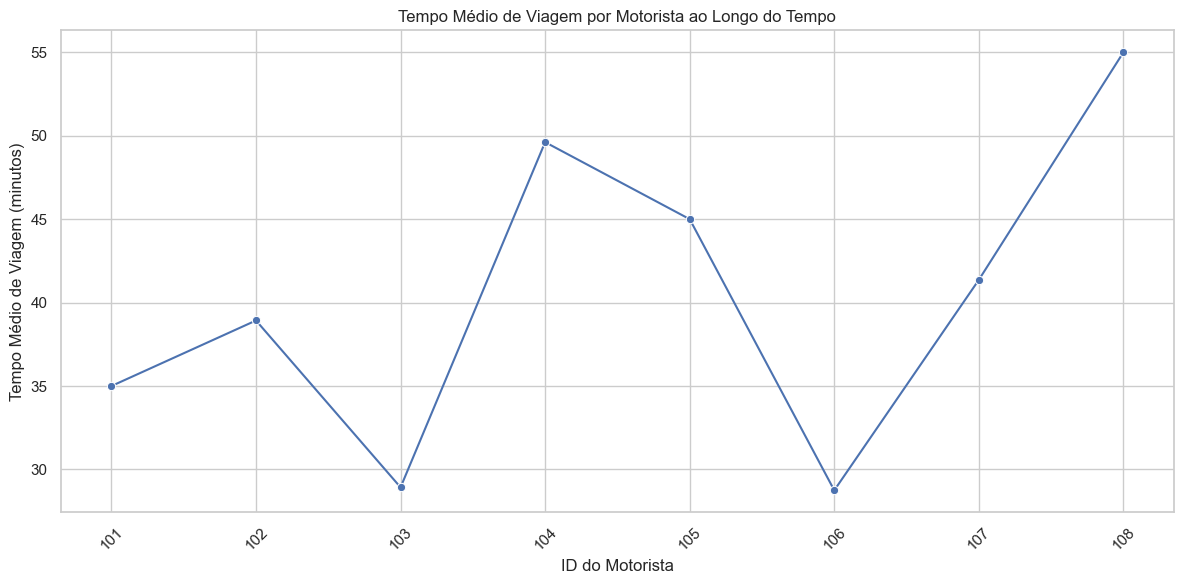

In [132]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=tendencias_motorista, x='ID_motorista', y='Tempo Médio de Viagem', marker='o', palette='viridis')
plt.title('Tempo Médio de Viagem por Motorista ao Longo do Tempo')
plt.xlabel('ID do Motorista')
plt.ylabel('Tempo Médio de Viagem (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
